[Mass shooting data from Time Magazine.](http://time.com/4368615/orlando-mass-shootings-chart/)

Also downloaded the original data from Mother Jones:  
Mother Jones' Investigation- US Mass Shootings, 1982-2016 - US mass shootings.csv

#### Data gathered using Google Trends  
Search terms give more data it seems. Also, need to overlap files for normalization. Google Trends does its own normalization. Trying to find an event/disaster/incident for each one, but doesn't always work. Becoming a topic corresponds with having a Wiki page, I think. Weekly looks like the minimum resolution. Weekly resolution is obtained when looking at a window of 5 years or less. That's why the data is in so many csv files.

Checked all the maxima for the datasets. All of them are the week of the shooting or later.

In the markdown description of the csv's, the numbers in brackets are to denote which columns are shared between DataFrames. They will need to be adjusted so that the least data is lost (data in columns is integer, so information gets lost on the small amplitude peaks thorugh flooring). To make amplitude comparison, one scale needs to be used. For normalization by maximum, take the duplicate column with the maximum value among the duplicates.

# Getting the Data

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### GT7.csv
* 2014 Isla Vista massacre: disaster
* 2012 Aurora shooting: disaster [1]
* Washington Navy Yard shooting: disaster
* 2009 Fort Hood shooting: event
* 2015 Chattanooga shootings: disaster

**Note:** The 2014 Fort Hood data seems small, so I'm going to also use the column here from 2009 Fort Hood as a second column for 2014 Fort Hood. I think the two terms have gotten conflated in Google's algorithm.

In [2]:
GT7 = pd.read_csv('GT7.csv', index_col=0, parse_dates=True)
GT7.rename(columns={'2009 Fort Hood shooting: (Worldwide)':'2014 Fort Hood from 2009 Data'}, inplace=True)
GT7.head()

,2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide)
Week,,,,,
2011-08-27,0,0,0,0,0
2011-09-03,0,0,0,0,0
2011-09-10,0,0,0,0,0
2011-09-17,0,0,0,0,0
2011-09-24,0,0,0,0,0


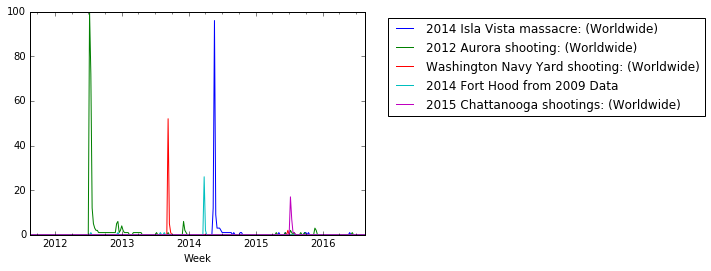

In [3]:
ax7 = GT7.plot()
ax7.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [4]:
#double check that the maximum corresponds with the date of the shooting
#good
GT7.idxmax()

2014 Isla Vista massacre: (Worldwide)        2014-05-24
2012 Aurora shooting: (Worldwide)            2012-07-14
Washington Navy Yard shooting: (Worldwide)   2013-09-14
2014 Fort Hood from 2009 Data                2014-03-29
2015 Chattanooga shootings: (Worldwide)      2015-07-11
dtype: datetime64[ns]

In [5]:
#display max values to help with normalization
GT7.max()

2014 Isla Vista massacre: (Worldwide)          96
2012 Aurora shooting: (Worldwide)             100
Washington Navy Yard shooting: (Worldwide)     52
2014 Fort Hood from 2009 Data                  26
2015 Chattanooga shootings: (Worldwide)        17
dtype: int64

### GT10.csv (GT10-small.csv is smaller date window)
* Binghamton shootings: disaster [7]
* Carthage nursing home shooting: event
* Kirkwood City Council shooting: disaster
* Trolley Square shooting: disaster
* Capitol Hill massacre: disaster [3]

In [6]:
GT10 = pd.read_csv('GT10-small.csv', index_col=0, parse_dates=True)
GT10.head()

,Binghamton shootings: (Worldwide),Carthage nursing home shooting: (Worldwide),Kirkwood City Council shooting: (Worldwide),Trolley Square shooting: (Worldwide),Capitol Hill massacre: (Worldwide)
Week,,,,,
2005-12-31,0,0,0,0,0
2006-01-07,0,0,0,0,0
2006-01-14,0,0,0,0,0
2006-01-21,0,0,0,0,0
2006-01-28,0,0,0,0,0


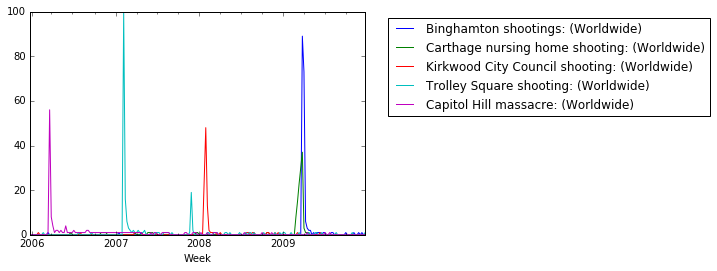

In [7]:
ax10 = GT10.plot()
ax10.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [8]:
#double check that the maximum corresponds with the date of the shooting
#good
GT10.idxmax()

Binghamton shootings: (Worldwide)             2009-03-28
Carthage nursing home shooting: (Worldwide)   2009-03-28
Kirkwood City Council shooting: (Worldwide)   2008-02-02
Trolley Square shooting: (Worldwide)          2007-02-10
Capitol Hill massacre: (Worldwide)            2006-03-25
dtype: datetime64[ns]

In [9]:
#display max values to help with normalization
GT10.max()

Binghamton shootings: (Worldwide)               89
Carthage nursing home shooting: (Worldwide)     37
Kirkwood City Council shooting: (Worldwide)     48
Trolley Square shooting: (Worldwide)           100
Capitol Hill massacre: (Worldwide)              56
dtype: int64

### GT11.csv
* Capitol Hill massacre: disaster [3]
* Goleta postal facility shootings: event
* Red Lake shootings: incident

In [10]:
GT11 = pd.read_csv('GT11.csv', index_col=0, parse_dates=True)
GT11.head()

,Capitol Hill massacre: (Worldwide),Goleta postal facility shootings: (Worldwide),Red Lake shootings: (Worldwide)
Week,,,
2005-01-01,0,0,1
2005-01-08,1,0,0
2005-01-15,0,0,0
2005-01-22,0,0,0
2005-01-29,0,1,0


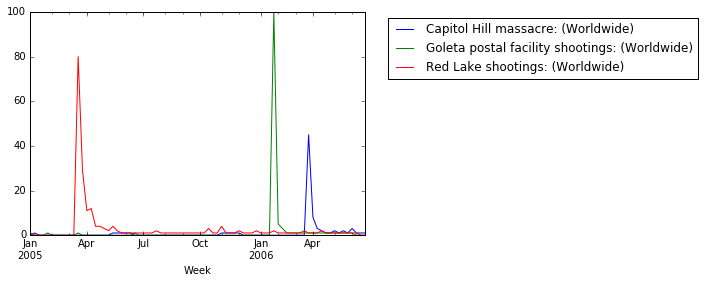

In [11]:
ax11 = GT11.plot()
ax11.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [12]:
#double check that the maximum corresponds with the date of the shooting
#good
GT11.idxmax()

Capitol Hill massacre: (Worldwide)              2006-03-25
Goleta postal facility shootings: (Worldwide)   2006-01-28
Red Lake shootings: (Worldwide)                 2005-03-19
dtype: datetime64[ns]

In [13]:
#display max values to help with normalization
GT11.max()

Capitol Hill massacre: (Worldwide)                45
Goleta postal facility shootings: (Worldwide)    100
Red Lake shootings: (Worldwide)                   80
dtype: int64

### GT14.csv
* Newtown School Shooting: Incident
* 2012 Aurora shooting: Disaster [1]

In [14]:
GT14 = pd.read_csv('GT14.csv', index_col=0, parse_dates=True)
GT14.head()

,Newtown School shooting: (Worldwide),2012 Aurora shooting: (Worldwide)
Week,,
2011-08-27,0,0
2011-09-03,0,0
2011-09-10,0,0
2011-09-17,0,0
2011-09-24,0,0


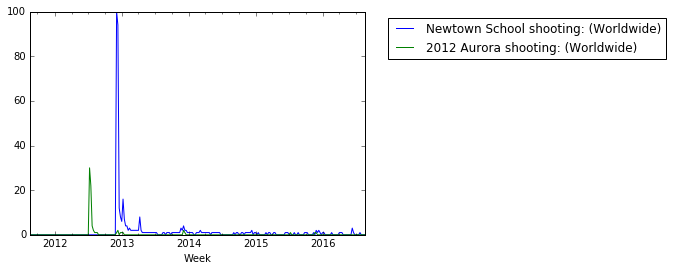

In [15]:
ax14 = GT14.plot()
ax14.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [16]:
#double check that the maximum corresponds with the date of the shooting
#good
GT14.idxmax()

Newtown School shooting: (Worldwide)   2012-12-08
2012 Aurora shooting: (Worldwide)      2012-07-14
dtype: datetime64[ns]

In [17]:
#display max values to help with normalization
GT14.max()

Newtown School shooting: (Worldwide)    100
2012 Aurora shooting: (Worldwide)        30
dtype: int64

### GT15.csv
* 2012 Aurora shooting: disaster [1]
* Charleston church shooting: disaster [4]
* 2011 Tucson shooting: event [6]
* 2012 Oak Creek shooting: incident [5]

In [18]:
GT15 = pd.read_csv('GT15.csv', index_col=0, parse_dates=True)
GT15.head()

,2012 Aurora shooting: (Worldwide),Charleston church shooting: (Worldwide),2011 Tucson shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide)
Week,,,,
2010-11-06,0,0,0,0
2010-11-13,0,0,0,0
2010-11-20,0,0,0,0
2010-11-27,0,0,0,0
2010-12-04,0,0,0,0


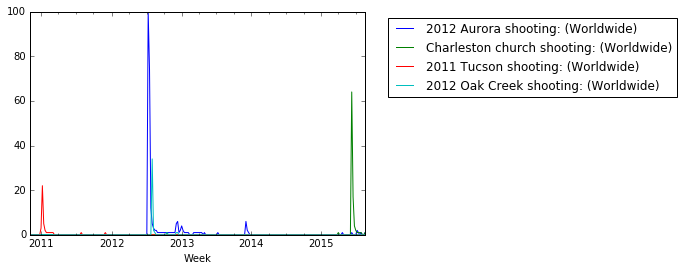

In [19]:
ax15 = GT15.plot()
ax15.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [20]:
#double check that the maximum corresponds with the date of the shooting
#good
GT15.idxmax()

2012 Aurora shooting: (Worldwide)         2012-07-14
Charleston church shooting: (Worldwide)   2015-06-13
2011 Tucson shooting: (Worldwide)         2011-01-08
2012 Oak Creek shooting: (Worldwide)      2012-08-04
dtype: datetime64[ns]

In [21]:
#display max values to help with normalization
GT15.max()

2012 Aurora shooting: (Worldwide)          100
Charleston church shooting: (Worldwide)     64
2011 Tucson shooting: (Worldwide)           22
2012 Oak Creek shooting: (Worldwide)        34
dtype: int64

### GT16.csv
* 2012 Oak Creek shooting: incident [5]
* Marysville Pilchuck High School shooting: disaster
* 2013 Santa Monica shooting: incident
* 2011 Seal Beach shooting: disaster [2]

In [22]:
GT16 = pd.read_csv('GT16.csv', index_col=0, parse_dates=True)
GT16.head()

,2012 Oak Creek shooting: (Worldwide),Marysville Pilchuck High School shooting: (Worldwide),2013 Santa Monica shooting: (Worldwide),2011 Seal Beach shooting: (Worldwide)
Week,,,,
2011-08-27,0,0,0,0
2011-09-03,0,0,0,0
2011-09-10,0,0,0,0
2011-09-17,0,0,0,0
2011-09-24,0,0,0,0


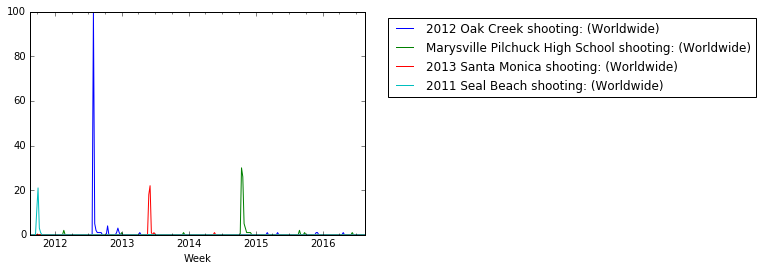

In [23]:
ax16 = GT16.plot()
ax16.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [24]:
#double check that the maximum corresponds with the date of the shooting
#good
GT16.idxmax()

2012 Oak Creek shooting: (Worldwide)                    2012-08-04
Marysville Pilchuck High School shooting: (Worldwide)   2014-10-18
2013 Santa Monica shooting: (Worldwide)                 2013-06-08
2011 Seal Beach shooting: (Worldwide)                   2011-10-08
dtype: datetime64[ns]

In [25]:
#display max values to help with normalization
GT16.max()

2012 Oak Creek shooting: (Worldwide)                     100
Marysville Pilchuck High School shooting: (Worldwide)     30
2013 Santa Monica shooting: (Worldwide)                   22
2011 Seal Beach shooting: (Worldwide)                     21
dtype: int64

### GT17.csv
* 2011 Seal Beach shooting: disaster [2]
* 2014 Fort Hood shooting: event
* Oikos University shooting: disaster
* 2009 shooting of Lakewood, Washington, police officers: disaster

In [26]:
GT17 = pd.read_csv('GT17.csv', index_col=0, parse_dates=True)
GT17.head()

,2011 Seal Beach shooting: (Worldwide),2014 Fort Hood shooting: (Worldwide),Oikos University shooting: (Worldwide),"2009 shooting of Lakewood, Washington, police officers: (Worldwide)"
Week,,,,
2009-06-06,0,0,0,0
2009-06-13,0,0,0,0
2009-06-20,0,0,0,0
2009-06-27,0,0,0,0
2009-07-04,0,0,0,0


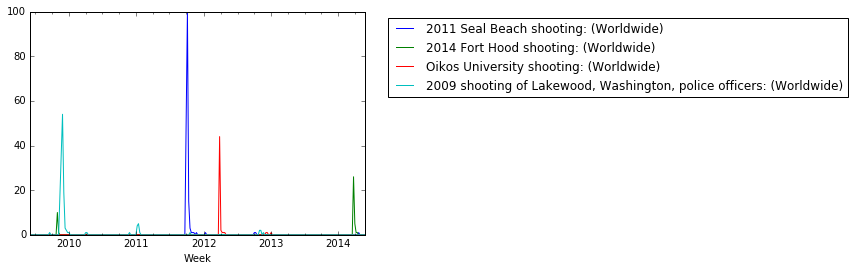

In [27]:
ax17 = GT17.plot()
ax17.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [28]:
#double check that the maximum corresponds with the date of the shooting
#good
GT17.idxmax()

2011 Seal Beach shooting: (Worldwide)                                 2011-10-08
2014 Fort Hood shooting: (Worldwide)                                  2014-03-29
Oikos University shooting: (Worldwide)                                2012-03-31
2009 shooting of Lakewood, Washington, police officers: (Worldwide)   2009-11-28
dtype: datetime64[ns]

In [29]:
#display max values to help with normalization
GT17.max()

2011 Seal Beach shooting: (Worldwide)                                  100
2014 Fort Hood shooting: (Worldwide)                                    26
Oikos University shooting: (Worldwide)                                  44
2009 shooting of Lakewood, Washington, police officers: (Worldwide)     54
dtype: int64

### GT18.csv
* Amish school shooting: hostage situation
* Westroads Mall shooting: disaster
* Northern Illinois University shooting: incident
* 2011 Tucson shooting: event [6]

In [30]:
GT18 = pd.read_csv('GT18.csv', index_col=0, parse_dates=True)
GT18.head()

,Amish school shooting: (Worldwide),Westroads Mall shooting: (Worldwide),Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide)
Week,,,,
2006-07-01,0,0,0,0
2006-07-08,0,0,0,0
2006-07-15,0,0,0,0
2006-07-22,0,0,0,0
2006-07-29,0,0,0,0


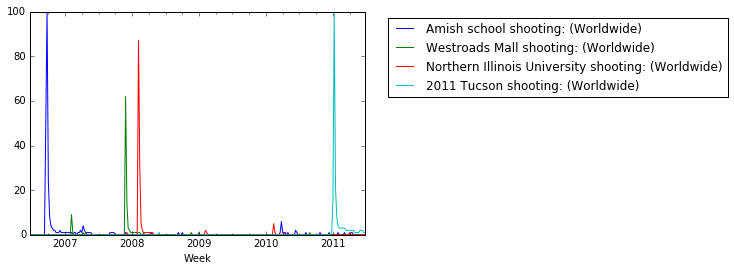

In [31]:
ax18 = GT18.plot()
ax18.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [32]:
#double check that the maximum corresponds with the date of the shooting
#good
GT18.idxmax()

Amish school shooting: (Worldwide)                   2006-09-30
Westroads Mall shooting: (Worldwide)                 2007-12-01
Northern Illinois University shooting: (Worldwide)   2008-02-09
2011 Tucson shooting: (Worldwide)                    2011-01-08
dtype: datetime64[ns]

In [33]:
#display max values to help with normalization
GT18.max()

Amish school shooting: (Worldwide)                    100
Westroads Mall shooting: (Worldwide)                   62
Northern Illinois University shooting: (Worldwide)     87
2011 Tucson shooting: (Worldwide)                      99
dtype: int64

### GT19.csv
* Virginia Tech shooting: incident
* 2011 Tucson shooting: event [6]

In [34]:
GT19 = pd.read_csv('GT19.csv', index_col=0, parse_dates=True)
GT19.head()

,Virginia Tech shooting: (Worldwide),2011 Tucson shooting: (Worldwide)
Week,,
2007-03-03,0,0
2007-03-10,0,0
2007-03-17,0,0
2007-03-24,0,0
2007-03-31,0,0


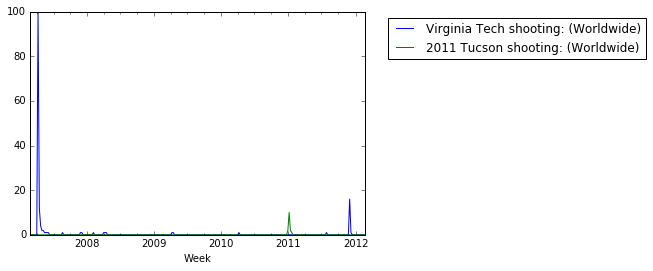

In [35]:
ax19 = GT19.plot()
ax19.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [36]:
#double check that the maximum corresponds with the date of the shooting
#good
GT19.idxmax()

Virginia Tech shooting: (Worldwide)   2007-04-14
2011 Tucson shooting: (Worldwide)     2011-01-08
dtype: datetime64[ns]

In [37]:
#display max values to help with normalization
GT19.max()

Virginia Tech shooting: (Worldwide)    100
2011 Tucson shooting: (Worldwide)       10
dtype: int64

### GT20.csv
* Binghamton shootings: disaster [7]
* 2011 Seal Beach shooting: disaster [2]

In [38]:
GT20 = pd.read_csv('GT20.csv', index_col=0, parse_dates=True)
GT20.head()

,Binghamton shootings: (Worldwide),2011 Seal Beach shooting: (Worldwide)
Week,,
2008-08-02,0,0
2008-08-09,0,0
2008-08-16,0,0
2008-08-23,0,0
2008-08-30,0,0


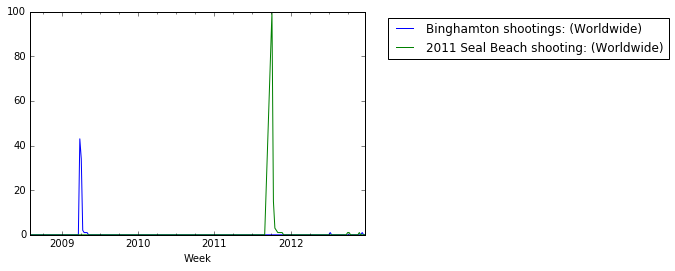

In [39]:
ax20 = GT20.plot()
ax20.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [40]:
#double check that the maximum corresponds with the date of the shooting
#good
GT20.idxmax()

Binghamton shootings: (Worldwide)       2009-03-28
2011 Seal Beach shooting: (Worldwide)   2011-10-08
dtype: datetime64[ns]

In [41]:
#display max values to help with normalization
GT20.max()

Binghamton shootings: (Worldwide)         43
2011 Seal Beach shooting: (Worldwide)    100
dtype: int64

### GT21.csv
* 2009 Fort Hood shooting: event
* 2012 Oak Creek shooting: incident [5]

In [42]:
GT21 = pd.read_csv('GT21.csv', index_col=0, parse_dates=True)
GT21.head()

,2009 Fort Hood shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide)
Week,,
2009-01-03,0,0
2009-01-10,0,0
2009-01-17,0,0
2009-01-24,0,0
2009-01-31,0,0


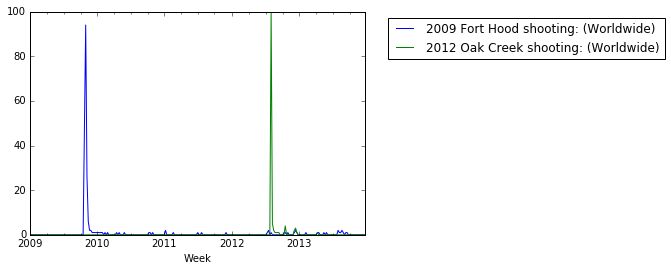

In [43]:
ax21 = GT21.plot()
ax21.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [44]:
#double check that the maximum corresponds with the date of the shooting
#good
GT21.idxmax()

2009 Fort Hood shooting: (Worldwide)   2009-10-31
2012 Oak Creek shooting: (Worldwide)   2012-08-04
dtype: datetime64[ns]

In [45]:
#display max values to help with normalization
GT21.max()

2009 Fort Hood shooting: (Worldwide)     94
2012 Oak Creek shooting: (Worldwide)    100
dtype: int64

# Merging the Datasets

#### GT7 and GT15 can be merged directly.

In [46]:
merged_dataset1 = pd.merge(GT7, GT15, on='2012 Aurora shooting: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset1.head()

,2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),2011 Tucson shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide)
Week,,,,,,,,
2010-11-06,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2010-11-13,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2010-11-20,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2010-11-27,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0
2010-12-04,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0


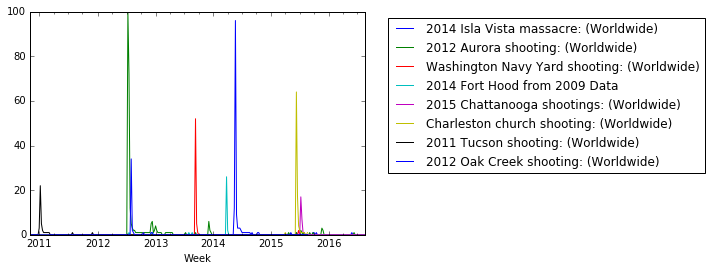

In [47]:
ax_merge1 = merged_dataset1.plot()
ax_merge1.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### GT17 and GT20 can be merged directly.

In [48]:
merged_dataset2 = pd.merge(GT17, GT20, on='2011 Seal Beach shooting: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset2.head()

,2011 Seal Beach shooting: (Worldwide),2014 Fort Hood shooting: (Worldwide),Oikos University shooting: (Worldwide),"2009 shooting of Lakewood, Washington, police officers: (Worldwide)",Binghamton shootings: (Worldwide)
Week,,,,,
2008-08-02,0.0,NaN,NaN,NaN,0.0
2008-08-09,0.0,NaN,NaN,NaN,0.0
2008-08-16,0.0,NaN,NaN,NaN,0.0
2008-08-23,0.0,NaN,NaN,NaN,0.0
2008-08-30,0.0,NaN,NaN,NaN,0.0


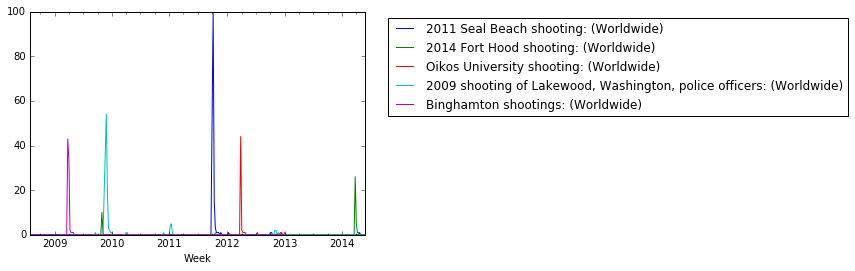

In [49]:
ax_merge2 = merged_dataset2.plot()
ax_merge2.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### GT16 and GT21 can be merged directly.

In [50]:
merged_dataset2_2 = pd.merge(GT16, GT21, on='2012 Oak Creek shooting: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset2_2.head()

,2012 Oak Creek shooting: (Worldwide),Marysville Pilchuck High School shooting: (Worldwide),2013 Santa Monica shooting: (Worldwide),2011 Seal Beach shooting: (Worldwide),2009 Fort Hood shooting: (Worldwide)
Week,,,,,
2009-01-03,0.0,NaN,NaN,NaN,0.0
2009-01-10,0.0,NaN,NaN,NaN,0.0
2009-01-17,0.0,NaN,NaN,NaN,0.0
2009-01-24,0.0,NaN,NaN,NaN,0.0
2009-01-31,0.0,NaN,NaN,NaN,0.0


In [51]:
merged_dataset2_2.max()

2012 Oak Creek shooting: (Worldwide)                     100.0
Marysville Pilchuck High School shooting: (Worldwide)     30.0
2013 Santa Monica shooting: (Worldwide)                   22.0
2011 Seal Beach shooting: (Worldwide)                     21.0
2009 Fort Hood shooting: (Worldwide)                      94.0
dtype: float64

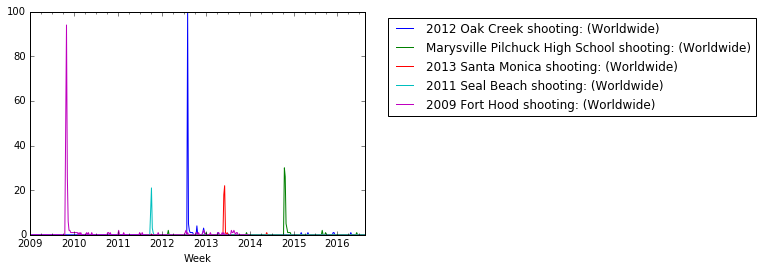

In [52]:
ax_merge2_2 = merged_dataset2_2.plot()
ax_merge2_2.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### Scale GT11 to match GT10 based on [3] and merge

In [53]:
GT10.loc['20060304':'20060429']

,Binghamton shootings: (Worldwide),Carthage nursing home shooting: (Worldwide),Kirkwood City Council shooting: (Worldwide),Trolley Square shooting: (Worldwide),Capitol Hill massacre: (Worldwide)
Week,,,,,
2006-03-04,0,0,0,0,0
2006-03-11,0,0,0,0,0
2006-03-18,1,0,0,0,1
2006-03-25,0,0,0,0,56
2006-04-01,0,0,0,0,8
2006-04-08,0,0,0,0,4
2006-04-15,0,0,0,0,1
2006-04-22,0,0,0,0,2
2006-04-29,0,0,0,0,2


In [54]:
GT11.loc['20060304':'20060429']

,Capitol Hill massacre: (Worldwide),Goleta postal facility shootings: (Worldwide),Red Lake shootings: (Worldwide)
Week,,,
2006-03-04,0,1,1
2006-03-11,0,1,1
2006-03-18,0,1,2
2006-03-25,45,1,1
2006-04-01,8,1,1
2006-04-08,3,1,1
2006-04-15,2,1,2
2006-04-22,1,1,1
2006-04-29,1,1,1


GT10 has more non-zero data points than GT11 for [3]. Scale GT11 up to the value for GT10, but use GT10 to make the merged [3].

In [55]:
scale = GT10['Capitol Hill massacre: (Worldwide)'].max() \
        / GT11['Capitol Hill massacre: (Worldwide)'].max()
scale

1.2444444444444445

In [56]:
GT11_scaled = GT11 * scale
GT11_scaled.loc['20060304':'20060429']

,Capitol Hill massacre: (Worldwide),Goleta postal facility shootings: (Worldwide),Red Lake shootings: (Worldwide)
Week,,,
2006-03-04,0.000000,1.244444,1.244444
2006-03-11,0.000000,1.244444,1.244444
2006-03-18,0.000000,1.244444,2.488889
2006-03-25,56.000000,1.244444,1.244444
2006-04-01,9.955556,1.244444,1.244444
2006-04-08,3.733333,1.244444,1.244444
2006-04-15,2.488889,1.244444,2.488889
2006-04-22,1.244444,1.244444,1.244444
2006-04-29,1.244444,1.244444,1.244444


In [57]:
merged_dataset3 = pd.merge(GT10, GT11_scaled, on='Capitol Hill massacre: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset3.loc['20060304':'20060429']

,Binghamton shootings: (Worldwide),Carthage nursing home shooting: (Worldwide),Kirkwood City Council shooting: (Worldwide),Trolley Square shooting: (Worldwide),Capitol Hill massacre: (Worldwide),Goleta postal facility shootings: (Worldwide),Red Lake shootings: (Worldwide)
Week,,,,,,,
2006-03-04,0.0,0.0,0.0,0.0,0.0,1.244444,1.244444
2006-03-11,0.0,0.0,0.0,0.0,0.0,1.244444,1.244444
2006-03-18,1.0,0.0,0.0,0.0,1.0,1.244444,2.488889
2006-03-25,0.0,0.0,0.0,0.0,56.0,1.244444,1.244444
2006-04-01,0.0,0.0,0.0,0.0,8.0,1.244444,1.244444
2006-04-08,0.0,0.0,0.0,0.0,4.0,1.244444,1.244444
2006-04-15,0.0,0.0,0.0,0.0,1.0,1.244444,2.488889
2006-04-22,0.0,0.0,0.0,0.0,2.0,1.244444,1.244444
2006-04-29,0.0,0.0,0.0,0.0,2.0,1.244444,1.244444


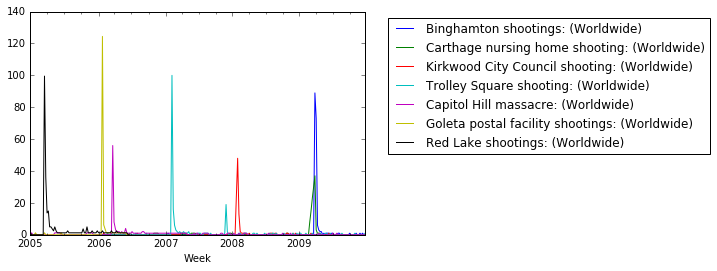

In [58]:
ax_merge3 = merged_dataset3.plot()
ax_merge3.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### Scale GT19 to GT18 and merge.

In [59]:
GT18.loc['20101211':'20110319']

,Amish school shooting: (Worldwide),Westroads Mall shooting: (Worldwide),Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide)
Week,,,,
2010-12-11,1,0,0,0
2010-12-18,0,0,0,0
2010-12-25,0,0,0,0
2011-01-01,0,0,0,16
2011-01-08,0,0,0,99
2011-01-15,0,0,0,21
2011-01-22,0,0,0,8
2011-01-29,1,0,0,4
2011-02-05,0,0,0,3


In [60]:
GT19.loc['20101211':'20110319']

,Virginia Tech shooting: (Worldwide),2011 Tucson shooting: (Worldwide)
Week,,
2010-12-11,0,0
2010-12-18,0,0
2010-12-25,0,0
2011-01-01,0,2
2011-01-08,0,10
2011-01-15,0,2
2011-01-22,0,1
2011-01-29,0,0
2011-02-05,0,0


GT18 has more non-zero data points than GT19 for [6]. Scale GT19 up to the value for GT18, but use GT18 to make the merged [6].

In [61]:
scale = GT18['2011 Tucson shooting: (Worldwide)'].max() \
        / GT19['2011 Tucson shooting: (Worldwide)'].max()
scale

9.9000000000000004

In [62]:
GT19_scaled = GT19 * scale
GT19_scaled.loc['20101211':'20110319']

,Virginia Tech shooting: (Worldwide),2011 Tucson shooting: (Worldwide)
Week,,
2010-12-11,0.0,0.0
2010-12-18,0.0,0.0
2010-12-25,0.0,0.0
2011-01-01,0.0,19.8
2011-01-08,0.0,99.0
2011-01-15,0.0,19.8
2011-01-22,0.0,9.9
2011-01-29,0.0,0.0
2011-02-05,0.0,0.0


In [63]:
merged_dataset4 = pd.merge(GT18, GT19_scaled, on='2011 Tucson shooting: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset4.loc['20101211':'20110319']

,Amish school shooting: (Worldwide),Westroads Mall shooting: (Worldwide),Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide),Virginia Tech shooting: (Worldwide)
Week,,,,,
2010-12-11,1.0,0.0,0.0,0.0,0.0
2010-12-18,0.0,0.0,0.0,0.0,0.0
2010-12-25,0.0,0.0,0.0,0.0,0.0
2011-01-01,0.0,0.0,0.0,16.0,0.0
2011-01-08,0.0,0.0,0.0,99.0,0.0
2011-01-15,0.0,0.0,0.0,21.0,0.0
2011-01-22,0.0,0.0,0.0,8.0,0.0
2011-01-29,1.0,0.0,0.0,4.0,0.0
2011-02-05,0.0,0.0,0.0,3.0,0.0


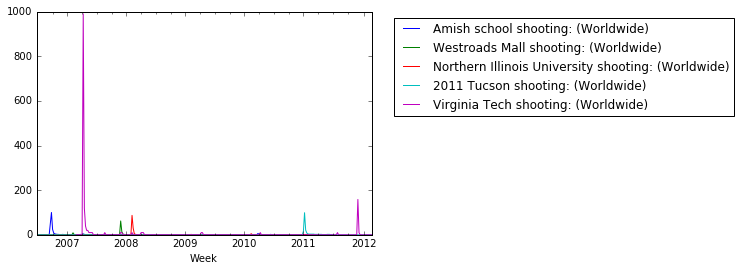

In [64]:
ax_merge4 = merged_dataset4.plot()
ax_merge4.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### Scale merged_dataset2_2 up to merged_dataset2 and merge

In [65]:
merged_dataset2_2.loc['20110917':'20111112']

,2012 Oak Creek shooting: (Worldwide),Marysville Pilchuck High School shooting: (Worldwide),2013 Santa Monica shooting: (Worldwide),2011 Seal Beach shooting: (Worldwide),2009 Fort Hood shooting: (Worldwide)
Week,,,,,
2011-09-17,0.0,0.0,0.0,0.0,0.0
2011-09-24,0.0,0.0,0.0,0.0,0.0
2011-10-01,0.0,0.0,0.0,11.0,0.0
2011-10-08,0.0,0.0,0.0,21.0,0.0
2011-10-15,0.0,0.0,0.0,3.0,0.0
2011-10-22,0.0,0.0,0.0,1.0,0.0
2011-10-29,0.0,0.0,0.0,0.0,0.0
2011-11-05,0.0,0.0,0.0,0.0,0.0
2011-11-12,0.0,0.0,0.0,0.0,0.0


In [66]:
merged_dataset2.loc['20110917':'20111112']

,2011 Seal Beach shooting: (Worldwide),2014 Fort Hood shooting: (Worldwide),Oikos University shooting: (Worldwide),"2009 shooting of Lakewood, Washington, police officers: (Worldwide)",Binghamton shootings: (Worldwide)
Week,,,,,
2011-09-17,0.0,0.0,0.0,0.0,0.0
2011-09-24,0.0,0.0,0.0,0.0,0.0
2011-10-01,50.0,0.0,0.0,0.0,0.0
2011-10-08,100.0,0.0,0.0,0.0,0.0
2011-10-15,15.0,0.0,0.0,0.0,0.0
2011-10-22,3.0,0.0,0.0,1.0,0.0
2011-10-29,1.0,0.0,0.0,0.0,0.0
2011-11-05,1.0,0.0,0.0,0.0,0.0
2011-11-12,1.0,0.0,0.0,0.0,0.0


merged_dataset2 has more non-zero data points than merged_dataset2_2 for [2]. Scale merged_dataset2_2 up to the value for merged_dataset2, but use merged_dataset2 to make the merged [2].

In [67]:
scale = merged_dataset2['2011 Seal Beach shooting: (Worldwide)'].max() \
        / merged_dataset2_2['2011 Seal Beach shooting: (Worldwide)'].max()
scale

4.7619047619047619

In [68]:
merged_dataset2_2_scaled = merged_dataset2_2 * scale
merged_dataset2_2_scaled.loc['20110917':'20111112']

,2012 Oak Creek shooting: (Worldwide),Marysville Pilchuck High School shooting: (Worldwide),2013 Santa Monica shooting: (Worldwide),2011 Seal Beach shooting: (Worldwide),2009 Fort Hood shooting: (Worldwide)
Week,,,,,
2011-09-17,0.0,0.0,0.0,0.000000,0.0
2011-09-24,0.0,0.0,0.0,0.000000,0.0
2011-10-01,0.0,0.0,0.0,52.380952,0.0
2011-10-08,0.0,0.0,0.0,100.000000,0.0
2011-10-15,0.0,0.0,0.0,14.285714,0.0
2011-10-22,0.0,0.0,0.0,4.761905,0.0
2011-10-29,0.0,0.0,0.0,0.000000,0.0
2011-11-05,0.0,0.0,0.0,0.000000,0.0
2011-11-12,0.0,0.0,0.0,0.000000,0.0


In [69]:
merged_dataset5 = pd.merge(merged_dataset2, merged_dataset2_2_scaled, on='2011 Seal Beach shooting: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset5.loc['20110917':'20111112']

,2011 Seal Beach shooting: (Worldwide),2014 Fort Hood shooting: (Worldwide),Oikos University shooting: (Worldwide),"2009 shooting of Lakewood, Washington, police officers: (Worldwide)",Binghamton shootings: (Worldwide),2012 Oak Creek shooting: (Worldwide),Marysville Pilchuck High School shooting: (Worldwide),2013 Santa Monica shooting: (Worldwide),2009 Fort Hood shooting: (Worldwide)
Week,,,,,,,,,
2011-09-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-09-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-01,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-08,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-15,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-10-22,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2011-10-29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2011-11-12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


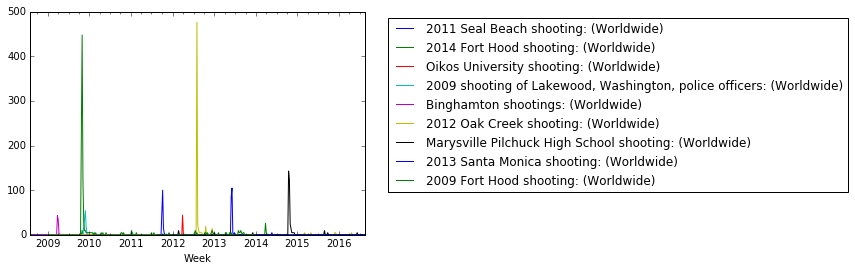

In [70]:
ax_merge5 = merged_dataset5.plot()
ax_merge5.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### Scale GT14 up to merged_dataset1 and merge

In [71]:
GT14.loc['20120630':'20120915']

,Newtown School shooting: (Worldwide),2012 Aurora shooting: (Worldwide)
Week,,
2012-06-30,0,0
2012-07-07,0,0
2012-07-14,0,30
2012-07-21,0,22
2012-07-28,0,4
2012-08-04,0,2
2012-08-11,0,1
2012-08-18,0,1
2012-08-25,0,1


In [72]:
merged_dataset1.loc['20120630':'20120915']

,2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),2011 Tucson shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide)
Week,,,,,,,,
2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-14,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-21,0.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-07-28,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-04,0.0,5.0,0.0,0.0,0.0,0.0,0.0,34.0
2012-08-11,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0
2012-08-18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
2012-08-25,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


merged_dataset1 has more non-zero data points than GT14 for [1]. Scale GT14 up to the value for merged_dataset1, but use merged_dataset1 to make the merged [1].

In [73]:
scale = merged_dataset1['2012 Aurora shooting: (Worldwide)'].max() \
        / GT14['2012 Aurora shooting: (Worldwide)'].max()
scale

3.3333333333333335

In [74]:
GT14_scaled = GT14 * scale
GT14_scaled.loc['20120630':'20120915']

,Newtown School shooting: (Worldwide),2012 Aurora shooting: (Worldwide)
Week,,
2012-06-30,0.0,0.000000
2012-07-07,0.0,0.000000
2012-07-14,0.0,100.000000
2012-07-21,0.0,73.333333
2012-07-28,0.0,13.333333
2012-08-04,0.0,6.666667
2012-08-11,0.0,3.333333
2012-08-18,0.0,3.333333
2012-08-25,0.0,3.333333


In [75]:
merged_dataset6 = pd.merge(merged_dataset1, GT14_scaled, on='2012 Aurora shooting: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset6.loc['20120630':'20120915']

,2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),2011 Tucson shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide),Newtown School shooting: (Worldwide)
Week,,,,,,,,,
2012-06-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-14,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-21,0.0,72.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-07-28,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-04,0.0,5.0,0.0,0.0,0.0,0.0,0.0,34.0,0.0
2012-08-11,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2012-08-18,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-08-25,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


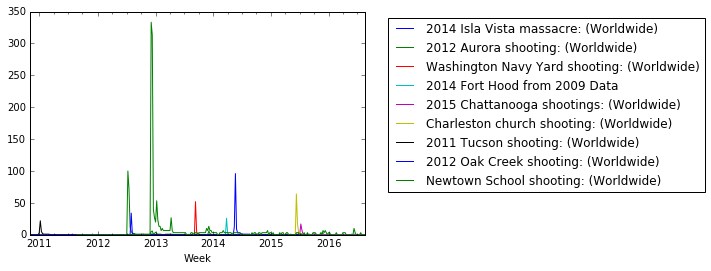

In [76]:
ax_merge6 = merged_dataset6.plot()
ax_merge6.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### Scale merged_dataset4 up to merged_dataset6 and merge

In [77]:
merged_dataset4.loc['20101211':'20110319']

,Amish school shooting: (Worldwide),Westroads Mall shooting: (Worldwide),Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide),Virginia Tech shooting: (Worldwide)
Week,,,,,
2010-12-11,1.0,0.0,0.0,0.0,0.0
2010-12-18,0.0,0.0,0.0,0.0,0.0
2010-12-25,0.0,0.0,0.0,0.0,0.0
2011-01-01,0.0,0.0,0.0,16.0,0.0
2011-01-08,0.0,0.0,0.0,99.0,0.0
2011-01-15,0.0,0.0,0.0,21.0,0.0
2011-01-22,0.0,0.0,0.0,8.0,0.0
2011-01-29,1.0,0.0,0.0,4.0,0.0
2011-02-05,0.0,0.0,0.0,3.0,0.0


In [78]:
merged_dataset6.loc['20101211':'20110319']

,2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),2011 Tucson shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide),Newtown School shooting: (Worldwide)
Week,,,,,,,,,
2010-12-11,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN
2010-12-18,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN
2010-12-25,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN
2011-01-01,NaN,0.0,NaN,NaN,NaN,0.0,3.0,0.0,NaN
2011-01-08,NaN,0.0,NaN,NaN,NaN,0.0,22.0,0.0,NaN
2011-01-15,NaN,0.0,NaN,NaN,NaN,0.0,5.0,0.0,NaN
2011-01-22,NaN,0.0,NaN,NaN,NaN,0.0,2.0,0.0,NaN
2011-01-29,NaN,0.0,NaN,NaN,NaN,0.0,1.0,0.0,NaN
2011-02-05,NaN,0.0,NaN,NaN,NaN,0.0,1.0,0.0,NaN


merged_dataset4 has more non-zero data points than merged_dataset6 for [6]. Scale merged_dataset6 up to the value for merged_dataset4, but use merged_dataset4 to make the merged [6].

In [79]:
scale = merged_dataset4['2011 Tucson shooting: (Worldwide)'].max() \
        / merged_dataset6['2011 Tucson shooting: (Worldwide)'].max()
scale

4.5

In [80]:
merged_dataset6_scaled = merged_dataset6 * scale
merged_dataset6_scaled.loc['20101211':'20110319']

,2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),2011 Tucson shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide),Newtown School shooting: (Worldwide)
Week,,,,,,,,,
2010-12-11,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN
2010-12-18,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN
2010-12-25,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN
2011-01-01,NaN,0.0,NaN,NaN,NaN,0.0,13.5,0.0,NaN
2011-01-08,NaN,0.0,NaN,NaN,NaN,0.0,99.0,0.0,NaN
2011-01-15,NaN,0.0,NaN,NaN,NaN,0.0,22.5,0.0,NaN
2011-01-22,NaN,0.0,NaN,NaN,NaN,0.0,9.0,0.0,NaN
2011-01-29,NaN,0.0,NaN,NaN,NaN,0.0,4.5,0.0,NaN
2011-02-05,NaN,0.0,NaN,NaN,NaN,0.0,4.5,0.0,NaN


In [81]:
merged_dataset7 = pd.merge(merged_dataset4, merged_dataset6_scaled, on='2011 Tucson shooting: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset7.loc['20101211':'20110319']

,Amish school shooting: (Worldwide),Westroads Mall shooting: (Worldwide),Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide),Virginia Tech shooting: (Worldwide),2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide),Newtown School shooting: (Worldwide)
Week,,,,,,,,,,,,,
2010-12-11,1.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2010-12-18,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2010-12-25,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2011-01-01,0.0,0.0,0.0,16.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2011-01-08,0.0,0.0,0.0,99.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2011-01-15,0.0,0.0,0.0,21.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2011-01-22,0.0,0.0,0.0,8.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2011-01-29,1.0,0.0,0.0,4.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN
2011-02-05,0.0,0.0,0.0,3.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN


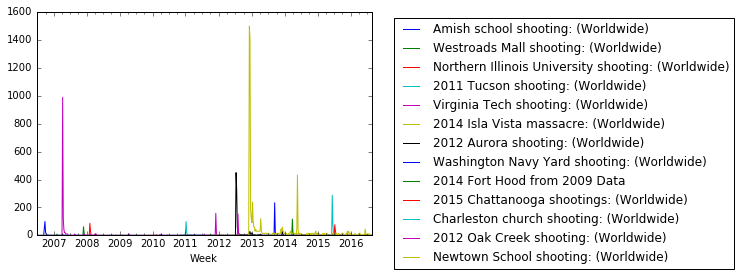

In [82]:
ax_merge7 = merged_dataset7.plot()
ax_merge7.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### Scale merged_dataset7 up to merged_dataset5 and merge.

In [83]:
merged_dataset5.loc['20120714':'20121020']

,2011 Seal Beach shooting: (Worldwide),2014 Fort Hood shooting: (Worldwide),Oikos University shooting: (Worldwide),"2009 shooting of Lakewood, Washington, police officers: (Worldwide)",Binghamton shootings: (Worldwide),2012 Oak Creek shooting: (Worldwide),Marysville Pilchuck High School shooting: (Worldwide),2013 Santa Monica shooting: (Worldwide),2009 Fort Hood shooting: (Worldwide)
Week,,,,,,,,,
2012-07-14,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,4.761905
2012-07-21,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,9.523810
2012-07-28,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2012-08-04,0.0,0.0,0.0,0.0,0.0,476.190476,0.0,0.0,4.761905
2012-08-11,0.0,0.0,0.0,0.0,0.0,23.809524,0.0,0.0,0.000000
2012-08-18,0.0,0.0,0.0,0.0,0.0,9.523810,0.0,0.0,0.000000
2012-08-25,0.0,0.0,0.0,0.0,0.0,4.761905,0.0,0.0,0.000000
2012-09-01,0.0,0.0,0.0,0.0,0.0,4.761905,0.0,0.0,0.000000
2012-09-08,0.0,0.0,0.0,0.0,0.0,4.761905,0.0,0.0,0.000000


In [84]:
merged_dataset7.loc['20120714':'20121020']

,Amish school shooting: (Worldwide),Westroads Mall shooting: (Worldwide),Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide),Virginia Tech shooting: (Worldwide),2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide),Newtown School shooting: (Worldwide)
Week,,,,,,,,,,,,,
2012-07-14,NaN,NaN,NaN,0.0,NaN,0.0,450.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-07-21,NaN,NaN,NaN,0.0,NaN,0.0,324.0,0.0,4.5,0.0,0.0,0.0,0.0
2012-07-28,NaN,NaN,NaN,0.0,NaN,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-08-04,NaN,NaN,NaN,0.0,NaN,0.0,22.5,0.0,0.0,0.0,0.0,153.0,0.0
2012-08-11,NaN,NaN,NaN,0.0,NaN,0.0,13.5,0.0,0.0,0.0,0.0,9.0,0.0
2012-08-18,NaN,NaN,NaN,0.0,NaN,0.0,9.0,0.0,0.0,0.0,0.0,4.5,0.0
2012-08-25,NaN,NaN,NaN,0.0,NaN,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-01,NaN,NaN,NaN,0.0,NaN,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0
2012-09-08,NaN,NaN,NaN,0.0,NaN,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0


merged_dataset5 has more non-zero data points than merged_dataset7 for [5]. Scale merged_dataset7 up to the value for merged_dataset5, but use merged_dataset5 to make the merged [5].

In [85]:
scale = merged_dataset5['2012 Oak Creek shooting: (Worldwide)'].max() \
        / merged_dataset7['2012 Oak Creek shooting: (Worldwide)'].max()
scale

3.1123560535325243

In [86]:
merged_dataset7_scaled = merged_dataset7 * scale
merged_dataset7_scaled.loc['20120714':'20121020']

,Amish school shooting: (Worldwide),Westroads Mall shooting: (Worldwide),Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide),Virginia Tech shooting: (Worldwide),2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),2012 Oak Creek shooting: (Worldwide),Newtown School shooting: (Worldwide)
Week,,,,,,,,,,,,,
2012-07-14,NaN,NaN,NaN,0.0,NaN,0.0,1400.560224,0.0,0.000000,0.0,0.000000,0.000000,0.0
2012-07-21,NaN,NaN,NaN,0.0,NaN,0.0,1008.403361,0.0,14.005602,0.0,0.000000,0.000000,0.0
2012-07-28,NaN,NaN,NaN,0.0,NaN,0.0,168.067227,0.0,0.000000,0.0,0.000000,0.000000,0.0
2012-08-04,NaN,NaN,NaN,0.0,NaN,0.0,70.028011,0.0,0.000000,0.0,0.000000,476.190476,0.0
2012-08-11,NaN,NaN,NaN,0.0,NaN,0.0,42.016807,0.0,0.000000,0.0,0.000000,28.011204,0.0
2012-08-18,NaN,NaN,NaN,0.0,NaN,0.0,28.011204,0.0,0.000000,0.0,0.000000,14.005602,0.0
2012-08-25,NaN,NaN,NaN,0.0,NaN,0.0,28.011204,0.0,0.000000,0.0,0.000000,0.000000,0.0
2012-09-01,NaN,NaN,NaN,0.0,NaN,0.0,14.005602,0.0,0.000000,0.0,0.000000,0.000000,0.0
2012-09-08,NaN,NaN,NaN,0.0,NaN,0.0,14.005602,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [87]:
merged_dataset8 = pd.merge(merged_dataset5, merged_dataset7_scaled, on='2012 Oak Creek shooting: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset8.loc['20120714':'20121020']

,2011 Seal Beach shooting: (Worldwide),2014 Fort Hood shooting: (Worldwide),Oikos University shooting: (Worldwide),"2009 shooting of Lakewood, Washington, police officers: (Worldwide)",Binghamton shootings: (Worldwide),2012 Oak Creek shooting: (Worldwide),Marysville Pilchuck High School shooting: (Worldwide),2013 Santa Monica shooting: (Worldwide),2009 Fort Hood shooting: (Worldwide),Amish school shooting: (Worldwide),...,Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide),Virginia Tech shooting: (Worldwide),2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),Newtown School shooting: (Worldwide)
Week,,,,,,,,,,,,,,,,,,,,,
2012-07-14,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,4.761905,NaN,...,NaN,0.0,NaN,0.0,1400.560224,0.0,0.000000,0.0,0.000000,0.0
2012-07-21,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,9.523810,NaN,...,NaN,0.0,NaN,0.0,1008.403361,0.0,14.005602,0.0,0.000000,0.0
2012-07-28,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,NaN,...,NaN,0.0,NaN,0.0,168.067227,0.0,0.000000,0.0,0.000000,0.0
2012-08-04,0.0,0.0,0.0,0.0,0.0,476.190476,0.0,0.0,4.761905,NaN,...,NaN,0.0,NaN,0.0,70.028011,0.0,0.000000,0.0,0.000000,0.0
2012-08-11,0.0,0.0,0.0,0.0,0.0,23.809524,0.0,0.0,0.000000,NaN,...,NaN,0.0,NaN,0.0,42.016807,0.0,0.000000,0.0,0.000000,0.0
2012-08-18,0.0,0.0,0.0,0.0,0.0,9.523810,0.0,0.0,0.000000,NaN,...,NaN,0.0,NaN,0.0,28.011204,0.0,0.000000,0.0,0.000000,0.0
2012-08-25,0.0,0.0,0.0,0.0,0.0,4.761905,0.0,0.0,0.000000,NaN,...,NaN,0.0,NaN,0.0,28.011204,0.0,0.000000,0.0,0.000000,0.0
2012-09-01,0.0,0.0,0.0,0.0,0.0,4.761905,0.0,0.0,0.000000,NaN,...,NaN,0.0,NaN,0.0,14.005602,0.0,0.000000,0.0,0.000000,0.0
2012-09-08,0.0,0.0,0.0,0.0,0.0,4.761905,0.0,0.0,0.000000,NaN,...,NaN,0.0,NaN,0.0,14.005602,0.0,0.000000,0.0,0.000000,0.0


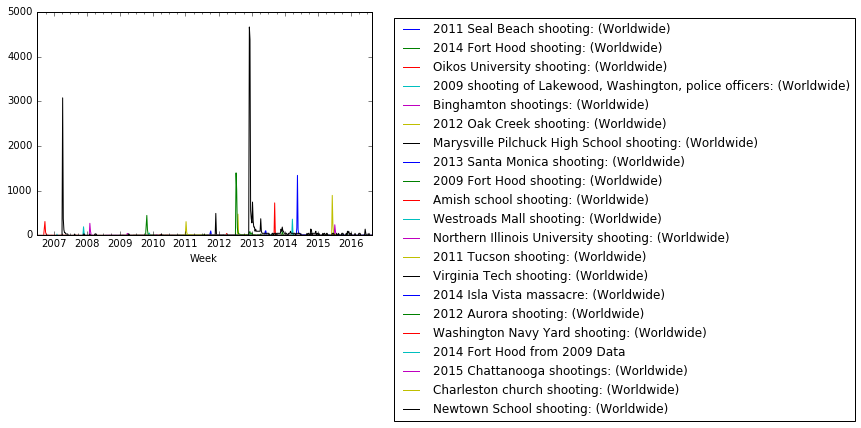

In [88]:
ax_merge8 = merged_dataset8.plot()
ax_merge8.legend(bbox_to_anchor=(1.05, 1), loc=2)

#### Scale merged_dataset3 down to merged_dataset8 and merge.

In [89]:
merged_dataset8.max()

2011 Seal Beach shooting: (Worldwide)                                   100.000000
2014 Fort Hood shooting: (Worldwide)                                     26.000000
Oikos University shooting: (Worldwide)                                   44.000000
2009 shooting of Lakewood, Washington, police officers: (Worldwide)      54.000000
Binghamton shootings: (Worldwide)                                        43.000000
2012 Oak Creek shooting: (Worldwide)                                    476.190476
Marysville Pilchuck High School shooting: (Worldwide)                   142.857143
2013 Santa Monica shooting: (Worldwide)                                 104.761905
2009 Fort Hood shooting: (Worldwide)                                    447.619048
Amish school shooting: (Worldwide)                                      311.235605
Westroads Mall shooting: (Worldwide)                                    192.966075
Northern Illinois University shooting: (Worldwide)                      270.774977
2011

In [90]:
merged_dataset3.loc['20090314':'20090606']

,Binghamton shootings: (Worldwide),Carthage nursing home shooting: (Worldwide),Kirkwood City Council shooting: (Worldwide),Trolley Square shooting: (Worldwide),Capitol Hill massacre: (Worldwide),Goleta postal facility shootings: (Worldwide),Red Lake shootings: (Worldwide)
Week,,,,,,,
2009-03-14,0.0,23.0,0.0,1.0,0.0,NaN,NaN
2009-03-21,0.0,30.0,0.0,0.0,0.0,NaN,NaN
2009-03-28,89.0,37.0,0.0,0.0,0.0,NaN,NaN
2009-04-04,73.0,3.0,0.0,0.0,0.0,NaN,NaN
2009-04-11,6.0,1.0,0.0,0.0,0.0,NaN,NaN
2009-04-18,3.0,1.0,0.0,0.0,1.0,NaN,NaN
2009-04-25,2.0,1.0,0.0,1.0,0.0,NaN,NaN
2009-05-02,2.0,0.0,0.0,0.0,0.0,NaN,NaN
2009-05-09,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [91]:
merged_dataset8.loc['20090314':'20090606']

,2011 Seal Beach shooting: (Worldwide),2014 Fort Hood shooting: (Worldwide),Oikos University shooting: (Worldwide),"2009 shooting of Lakewood, Washington, police officers: (Worldwide)",Binghamton shootings: (Worldwide),2012 Oak Creek shooting: (Worldwide),Marysville Pilchuck High School shooting: (Worldwide),2013 Santa Monica shooting: (Worldwide),2009 Fort Hood shooting: (Worldwide),Amish school shooting: (Worldwide),...,Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide),Virginia Tech shooting: (Worldwide),2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),Newtown School shooting: (Worldwide)
Week,,,,,,,,,,,,,,,,,,,,,
2009-03-14,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-21,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-28,0.0,NaN,NaN,NaN,43.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-04,0.0,NaN,NaN,NaN,34.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-11,0.0,NaN,NaN,NaN,2.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,30.812325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-18,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,30.812325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-25,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-02,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-09,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


merged_dataset3 has more non-zero data points than merged_dataset8 for [7]. Scale merged_dataset3 down to the value for merged_dataset8 and use merged_dataset3 to make the merged [7].

In [92]:
scale = merged_dataset8['Binghamton shootings: (Worldwide)'].max() \
        / merged_dataset3['Binghamton shootings: (Worldwide)'].max()
scale

0.48314606741573035

In [93]:
merged_dataset3_scaled = merged_dataset3 * scale
merged_dataset3_scaled.loc['20090314':'20090606']

,Binghamton shootings: (Worldwide),Carthage nursing home shooting: (Worldwide),Kirkwood City Council shooting: (Worldwide),Trolley Square shooting: (Worldwide),Capitol Hill massacre: (Worldwide),Goleta postal facility shootings: (Worldwide),Red Lake shootings: (Worldwide)
Week,,,,,,,
2009-03-14,0.000000,11.112360,0.0,0.483146,0.000000,NaN,NaN
2009-03-21,0.000000,14.494382,0.0,0.000000,0.000000,NaN,NaN
2009-03-28,43.000000,17.876404,0.0,0.000000,0.000000,NaN,NaN
2009-04-04,35.269663,1.449438,0.0,0.000000,0.000000,NaN,NaN
2009-04-11,2.898876,0.483146,0.0,0.000000,0.000000,NaN,NaN
2009-04-18,1.449438,0.483146,0.0,0.000000,0.483146,NaN,NaN
2009-04-25,0.966292,0.483146,0.0,0.483146,0.000000,NaN,NaN
2009-05-02,0.966292,0.000000,0.0,0.000000,0.000000,NaN,NaN
2009-05-09,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN


In [94]:
merged_dataset9 = pd.merge(merged_dataset3_scaled, merged_dataset8, on='Binghamton shootings: (Worldwide)', 
                           left_index=True, right_index=True, how='outer')
merged_dataset9.loc['20090314':'20090606']

,Binghamton shootings: (Worldwide),Carthage nursing home shooting: (Worldwide),Kirkwood City Council shooting: (Worldwide),Trolley Square shooting: (Worldwide),Capitol Hill massacre: (Worldwide),Goleta postal facility shootings: (Worldwide),Red Lake shootings: (Worldwide),2011 Seal Beach shooting: (Worldwide),2014 Fort Hood shooting: (Worldwide),Oikos University shooting: (Worldwide),...,Northern Illinois University shooting: (Worldwide),2011 Tucson shooting: (Worldwide),Virginia Tech shooting: (Worldwide),2014 Isla Vista massacre: (Worldwide),2012 Aurora shooting: (Worldwide),Washington Navy Yard shooting: (Worldwide),2014 Fort Hood from 2009 Data,2015 Chattanooga shootings: (Worldwide),Charleston church shooting: (Worldwide),Newtown School shooting: (Worldwide)
Week,,,,,,,,,,,,,,,,,,,,,
2009-03-14,0.000000,11.112360,0.0,0.483146,0.000000,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-21,0.000000,14.494382,0.0,0.000000,0.000000,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-28,43.000000,17.876404,0.0,0.000000,0.000000,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-04,35.269663,1.449438,0.0,0.000000,0.000000,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-11,2.898876,0.483146,0.0,0.000000,0.000000,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,30.812325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-18,1.449438,0.483146,0.0,0.000000,0.483146,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,30.812325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-25,0.966292,0.483146,0.0,0.483146,0.000000,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-02,0.966292,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-09,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,0.0,NaN,NaN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


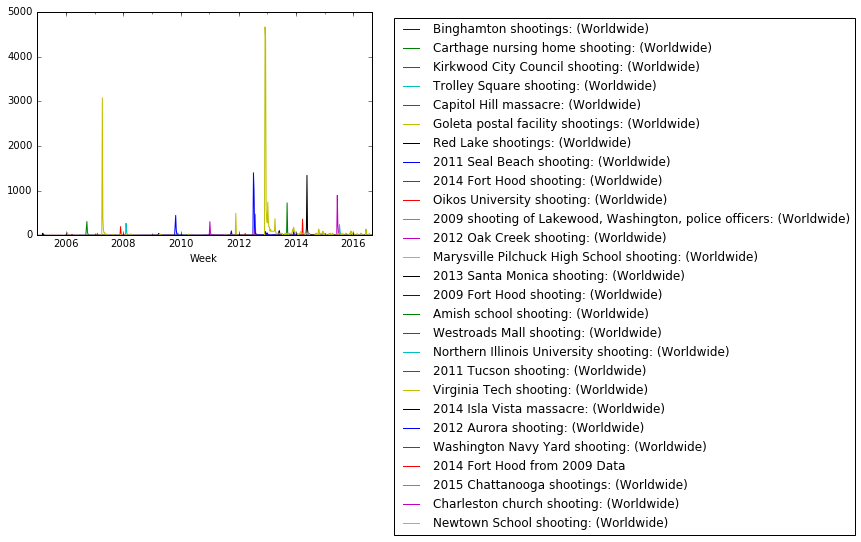

In [95]:
ax_merge9 = merged_dataset9.plot()
ax_merge9.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [96]:
merged_dataset9.max()

Binghamton shootings: (Worldwide)                                        43.000000
Carthage nursing home shooting: (Worldwide)                              17.876404
Kirkwood City Council shooting: (Worldwide)                              23.191011
Trolley Square shooting: (Worldwide)                                     48.314607
Capitol Hill massacre: (Worldwide)                                       27.056180
Goleta postal facility shootings: (Worldwide)                            60.124844
Red Lake shootings: (Worldwide)                                          48.099875
2011 Seal Beach shooting: (Worldwide)                                   100.000000
2014 Fort Hood shooting: (Worldwide)                                     26.000000
Oikos University shooting: (Worldwide)                                   44.000000
2009 shooting of Lakewood, Washington, police officers: (Worldwide)      54.000000
2012 Oak Creek shooting: (Worldwide)                                    476.190476
Mary

In [97]:
#check that the dates are still correct
test = merged_dataset9.idxmax()
test.sort_values(inplace=True, ascending=False)
test

2015 Chattanooga shootings: (Worldwide)                               2015-07-11
Charleston church shooting: (Worldwide)                               2015-06-13
Marysville Pilchuck High School shooting: (Worldwide)                 2014-10-18
2014 Isla Vista massacre: (Worldwide)                                 2014-05-24
2014 Fort Hood from 2009 Data                                         2014-03-29
2014 Fort Hood shooting: (Worldwide)                                  2014-03-29
Washington Navy Yard shooting: (Worldwide)                            2013-09-14
2013 Santa Monica shooting: (Worldwide)                               2013-06-08
Newtown School shooting: (Worldwide)                                  2012-12-08
2012 Oak Creek shooting: (Worldwide)                                  2012-08-04
2012 Aurora shooting: (Worldwide)                                     2012-07-14
Oikos University shooting: (Worldwide)                                2012-03-31
2011 Seal Beach shooting: (W

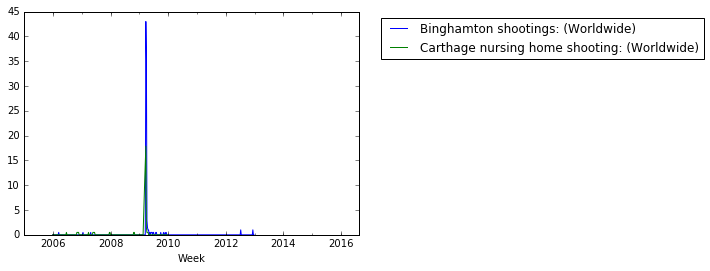

In [98]:
ax_test = merged_dataset9['Binghamton shootings: (Worldwide)'].plot()
merged_dataset9['Carthage nursing home shooting: (Worldwide)'].plot()
ax_test.legend(bbox_to_anchor=(1.05, 1), loc=2)

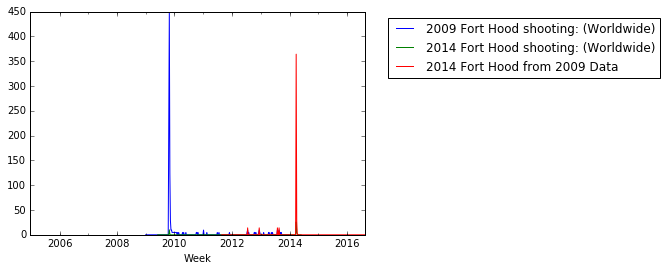

In [99]:
ax_test = merged_dataset9['2009 Fort Hood shooting: (Worldwide)'].plot()
merged_dataset9['2014 Fort Hood shooting: (Worldwide)'].plot()
merged_dataset9['2014 Fort Hood from 2009 Data'].plot()
ax_test.legend(bbox_to_anchor=(1.05, 1), loc=2)

2009 Fort Hood got cut off in GT7. Created a new csv with the correct time window. Also kept the 2009 data in the 2014 window because I think the search algorithm is off in this case. The data from the 2014 search is much smaller than the second peak in the 2009 data.

# Cleaning up the data and exporting

In [100]:
#remove : (Worldwide) from the name and add years to the ones that don't have them
cols = merged_dataset9.columns.tolist()

In [101]:
cols2 = ['2009 Binghamton shootings',
 '2009 Carthage nursing home shooting',
 '2008 Kirkwood City Council shooting',
 '2007 Trolley Square shooting',
 '2006 Capitol Hill massacre',
 '2006 Goleta postal facility shootings',
 '2005 Red Lake shootings',
 '2011 Seal Beach shooting',
 '2014 Fort Hood shooting',
 '2012 Oikos University shooting',
 '2009 shooting of Lakewood, Washington, police officers',
 '2012 Oak Creek shooting',
 '2014 Marysville Pilchuck High School shooting',
 '2013 Santa Monica shooting',
 '2009 Fort Hood shooting',
 '2006 Amish school shooting',
 '2007 Westroads Mall shooting',
 '2008 Northern Illinois University shooting',
 '2011 Tucson shooting',
 '2007 Virginia Tech shooting',
 '2014 Isla Vista massacre',
 '2012 Aurora shooting',
 '2013 Washington Navy Yard shooting',
 '2014 Fort Hood from 2009 Data',
 '2015 Chattanooga shootings',
 '2015 Charleston church shooting',
 '2012 Newtown School shooting']

In [102]:
cols

['Binghamton shootings: (Worldwide)',
 'Carthage nursing home shooting: (Worldwide)',
 'Kirkwood City Council shooting: (Worldwide)',
 'Trolley Square shooting: (Worldwide)',
 'Capitol Hill massacre: (Worldwide)',
 'Goleta postal facility shootings: (Worldwide)',
 'Red Lake shootings: (Worldwide)',
 '2011 Seal Beach shooting: (Worldwide)',
 '2014 Fort Hood shooting: (Worldwide)',
 'Oikos University shooting: (Worldwide)',
 '2009 shooting of Lakewood, Washington, police officers: (Worldwide)',
 '2012 Oak Creek shooting: (Worldwide)',
 'Marysville Pilchuck High School shooting: (Worldwide)',
 '2013 Santa Monica shooting: (Worldwide)',
 '2009 Fort Hood shooting: (Worldwide)',
 'Amish school shooting: (Worldwide)',
 'Westroads Mall shooting: (Worldwide)',
 'Northern Illinois University shooting: (Worldwide)',
 '2011 Tucson shooting: (Worldwide)',
 'Virginia Tech shooting: (Worldwide)',
 '2014 Isla Vista massacre: (Worldwide)',
 '2012 Aurora shooting: (Worldwide)',
 'Washington Navy Yard sh

In [103]:
cols2

['2009 Binghamton shootings',
 '2009 Carthage nursing home shooting',
 '2008 Kirkwood City Council shooting',
 '2007 Trolley Square shooting',
 '2006 Capitol Hill massacre',
 '2006 Goleta postal facility shootings',
 '2005 Red Lake shootings',
 '2011 Seal Beach shooting',
 '2014 Fort Hood shooting',
 '2012 Oikos University shooting',
 '2009 shooting of Lakewood, Washington, police officers',
 '2012 Oak Creek shooting',
 '2014 Marysville Pilchuck High School shooting',
 '2013 Santa Monica shooting',
 '2009 Fort Hood shooting',
 '2006 Amish school shooting',
 '2007 Westroads Mall shooting',
 '2008 Northern Illinois University shooting',
 '2011 Tucson shooting',
 '2007 Virginia Tech shooting',
 '2014 Isla Vista massacre',
 '2012 Aurora shooting',
 '2013 Washington Navy Yard shooting',
 '2014 Fort Hood from 2009 Data',
 '2015 Chattanooga shootings',
 '2015 Charleston church shooting',
 '2012 Newtown School shooting']

In [104]:
merged_dataset9.columns=cols2

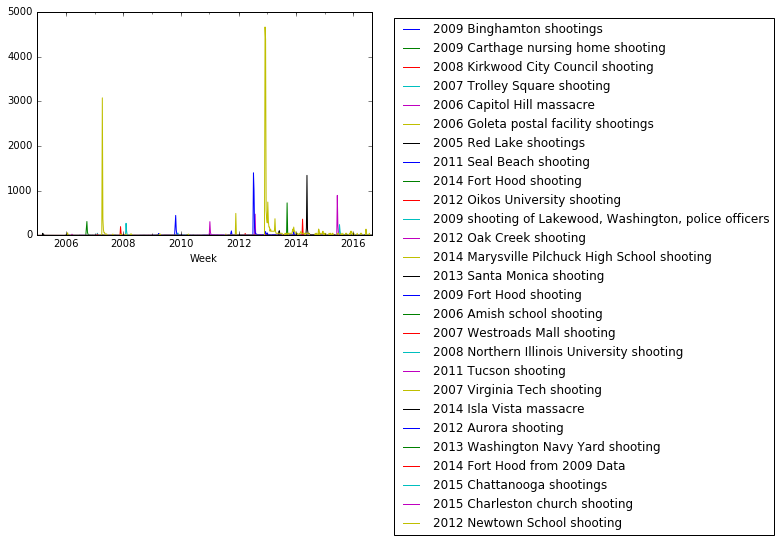

In [105]:
ax_merge9 = merged_dataset9.plot()
ax_merge9.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [106]:
#sort by year and replace NaNs with 0.0
full_dataset = merged_dataset9.sort_index(axis=1)
full_dataset[pd.isnull(full_dataset)] = 0.0
full_dataset.head()

,2005 Red Lake shootings,2006 Amish school shooting,2006 Capitol Hill massacre,2006 Goleta postal facility shootings,2007 Trolley Square shooting,2007 Virginia Tech shooting,2007 Westroads Mall shooting,2008 Kirkwood City Council shooting,2008 Northern Illinois University shooting,2009 Binghamton shootings,...,2012 Oak Creek shooting,2012 Oikos University shooting,2013 Santa Monica shooting,2013 Washington Navy Yard shooting,2014 Fort Hood from 2009 Data,2014 Fort Hood shooting,2014 Isla Vista massacre,2014 Marysville Pilchuck High School shooting,2015 Charleston church shooting,2015 Chattanooga shootings
Week,,,,,,,,,,,,,,,,,,,,,
2005-01-01,0.601248,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-08,0.000000,0.0,0.601248,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-15,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-22,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-29,0.000000,0.0,0.000000,0.601248,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


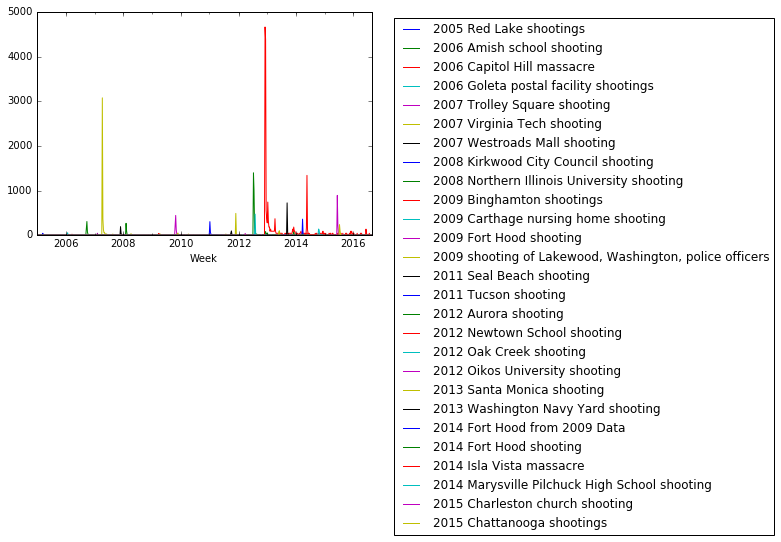

In [107]:
ax_full = full_dataset.plot()
ax_full.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [108]:
#write to file
#full_dataset.to_csv('full_data_unnormalized.csv')

In [112]:
#normalize to have max = 1
maxes = full_dataset.max()
full_dataset_norm = full_dataset / maxes

2005 Red Lake shootings                                   1.0
2006 Amish school shooting                                1.0
2006 Capitol Hill massacre                                1.0
2006 Goleta postal facility shootings                     1.0
2007 Trolley Square shooting                              1.0
2007 Virginia Tech shooting                               1.0
2007 Westroads Mall shooting                              1.0
2008 Kirkwood City Council shooting                       1.0
2008 Northern Illinois University shooting                1.0
2009 Binghamton shootings                                 1.0
2009 Carthage nursing home shooting                       1.0
2009 Fort Hood shooting                                   1.0
2009 shooting of Lakewood, Washington, police officers    1.0
2011 Seal Beach shooting                                  1.0
2011 Tucson shooting                                      1.0
2012 Aurora shooting                                      1.0
2012 New

In [113]:
#write to file
full_dataset_norm.to_csv('full_data_max_normalized.csv')